# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
# ---- Insert other imports ----

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [2]:
df_spotify_0 = pd.read_csv("spotify_data/streaminghistory0.csv")

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [3]:
help(pd.DataFrame.tail)
help(pd.DataFrame.head)

Help on function tail in module pandas.core.generic:

tail(self, n: 'int' = 5) -> 'Self'
    Return the last `n` rows.

    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.

    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.

    If n is larger than the number of rows, this function returns all rows.

    Parameters
    ----------
    n : int, default 5
        Number of rows to select.

    Returns
    -------
    type of caller
        The last `n` rows of the caller object.

    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.

    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        be

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [4]:
print(df_spotify_0.head(5))
print(df_spotify_0.tail(5))

            endTime            artistName                        trackName  \
0  2022-12-03 02:02  Cigarettes After Sex                            Truly   
1  2022-12-03 02:02         Leonard Cohen  Take This Waltz - Paris Version   
2  2022-12-06 21:05          Vlad Holiday                 So Damn Into You   
3  2022-12-06 21:05                 Lorde                             Team   
4  2022-12-06 21:05         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  
                endTime         artistName                     trackName  \
11954  2023-01-02 20:59  Kaizers Orchestra                   Resistansen   
11955  2023-01-02 20:59           Mr.Kitty                    After Dark   
11956  2023-01-02 20:59       daddy's girl  after dark x sweater weather   
11957  2023-01-02 20:59       daddy's girl  after dark x sweater weather   
11958  2023-01-02 20:59       daddy's girl  after dark x sweater we

#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [5]:
df_spotify_0["endTime"] = pd.to_datetime(df_spotify_0["endTime"])
df_spotify_0["artistName"] = df_spotify_0["artistName"].astype("string")
df_spotify_0["trackName"] = df_spotify_0["trackName"].astype("string")
#df_spotify_0["msPlayed"] = df_spotify_0["msPlayed"].astype("int") Keeping as float.
df_spotify_0.dtypes

endTime       datetime64[ns]
artistName    string[python]
trackName     string[python]
msPlayed             float64
dtype: object

#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [6]:
df_spotify_0["artistName"].nunique()

495

#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [7]:
df_spotify_0["trackName"].nunique()

1308

In [8]:
df_spotify_0.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [9]:
#Finding the timeframe of the dataframe
print(df_spotify_0["endTime"].min())
print(df_spotify_0["endTime"].max())

2022-12-03 02:02:00
2023-01-02 20:59:00


### Part 1: Questions
Q1: Which columns are in the dataset?

Q2: What timeframe does the dataset span?

Q3: How many unique artists are in the dataset?

Q4: How many unique songs are in the dataset?

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [10]:
check = False
for file in os.listdir("spotify_data"):
    if not file.endswith(".csv"):
        continue
    if not check:
        df = pd.read_csv("spotify_data/" + file)
        check = True
    else:
        df = pd.concat([df, pd.read_csv("spotify_data/" + file)])

df["endTime"] = pd.to_datetime(df["endTime"])
df["artistName"] = df["artistName"].astype("string")
df["trackName"] = df["trackName"].astype("string")
df["msPlayed"] = df["msPlayed"].astype("float")
print(df.shape)
print(df.dtypes)
df.head()

        

(167439, 4)
endTime       datetime64[ns]
artistName    string[python]
trackName     string[python]
msPlayed             float64
dtype: object


,endTime,artistName,trackName,msPlayed
0,2023-08-11 09:14:00,Yumi Zouma,Yesterday,1770.0
1,2023-08-11 09:14:00,BØRNS,"10,000 Emerald Pools",4160.0
2,2023-08-11 09:14:00,Gorillaz,She's My Collar (feat. Kali Uchis),810.0
3,2023-08-11 09:14:00,Mötley Crüe,Dr. Feelgood,1706.0
4,2023-08-11 09:14:00,Pixies,Here Comes Your Man,14191.0


#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [11]:
df.sort_values("endTime", inplace = True)
display(df.head(3))
df.tail(3)


,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0


,endTime,artistName,trackName,msPlayed
11969,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
11971,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14661.0
9062,NaT,The Lumineers,Ophelia,371.0


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [12]:
print(f"Before: {df["endTime"].min()}")
df = df[df["endTime"] >= "2023-01-01"]
print(f"After: {df["endTime"].min()}")

Before: 2022-12-03 02:02:00
After: 2023-01-01 01:17:00


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [13]:
df.dropna(axis=0, inplace=True)

#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [14]:
df["secPlayed"] = df["msPlayed"] / 1000
df.drop("msPlayed", axis=1, inplace=True)

#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

<Axes: xlabel='artistName'>

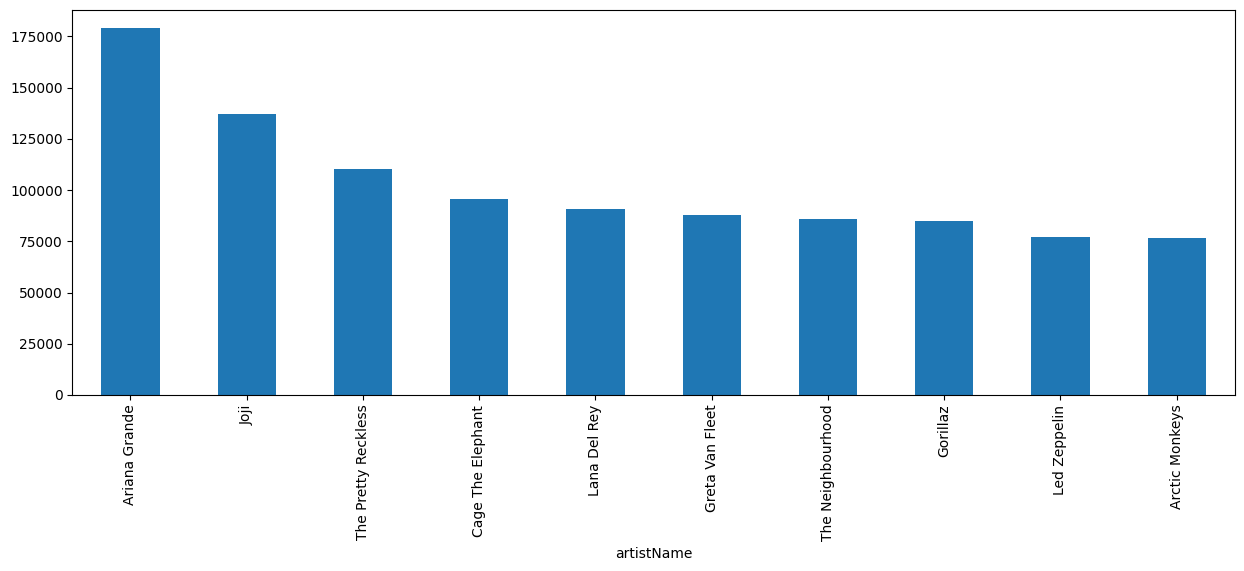

In [15]:
artistName = df.groupby("artistName")["secPlayed"].sum().sort_values(ascending=False)
#Keep only ten most played artists
artistName = artistName.head(10)
artistName.plot(kind="bar", figsize=(15, 5))

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

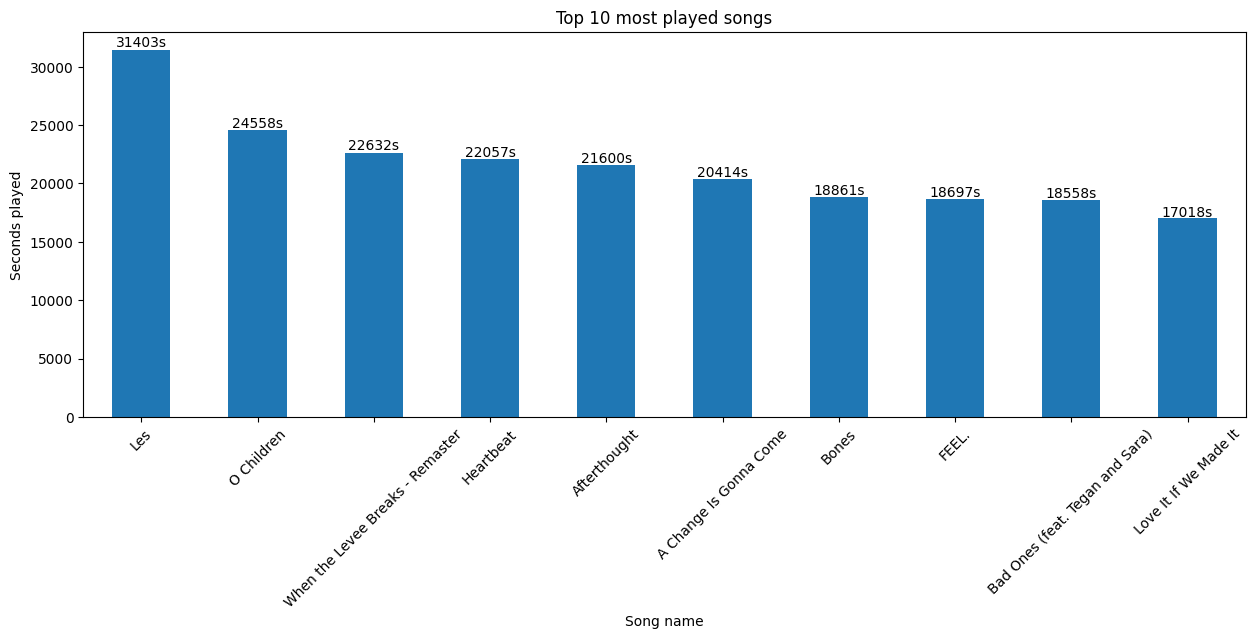

In [16]:
songName = df.groupby("trackName")["secPlayed"].sum().sort_values(ascending=False)
#Keep only ten most played artists
songName = songName.head(10)
ax = songName.plot(kind="bar", figsize=(15, 5))
for i, v in enumerate(songName):
    ax.text(i, v + (v * 0.01), f"{v:.0f}s", ha='center', fontsize=10)
ax.set_title("Top 10 most played songs")
ax.set_ylabel("Seconds played")
ax.set_xlabel("Song name")
plt.xticks(rotation=45);

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

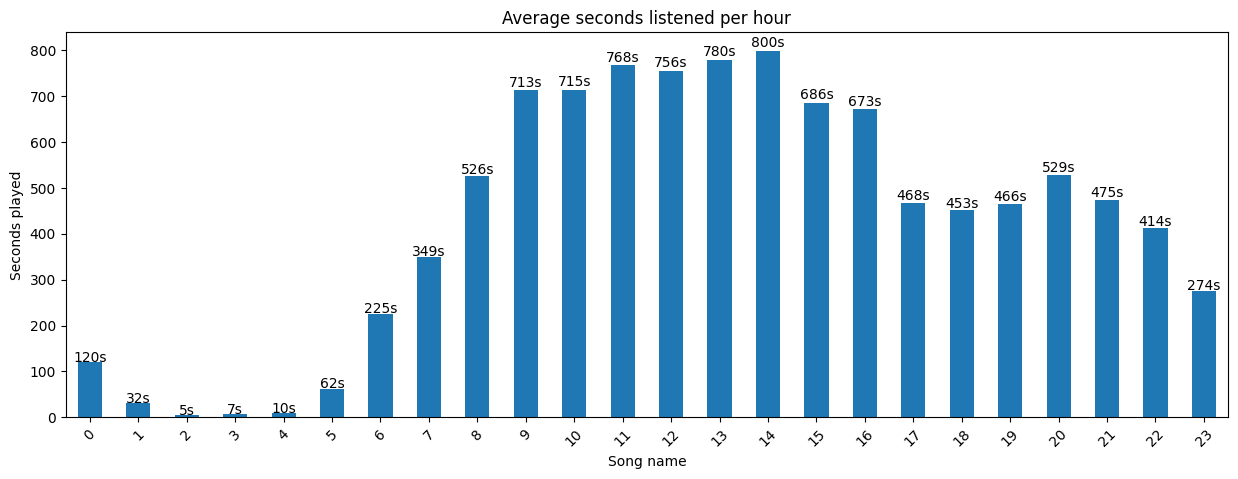

In [17]:
df["hour"] = df["endTime"].dt.hour
hour_df = df.groupby("hour")["secPlayed"].sum()/365

ax = hour_df.plot(kind="bar", figsize=(15, 5))
for i, v in enumerate(hour_df):
    ax.text(i, v + (v * 0.01), f"{v:.0f}s", ha='center', fontsize=10)
ax.set_title("Average seconds listened per hour")
ax.set_ylabel("Seconds played")
ax.set_xlabel("Song name")
plt.xticks(rotation=45);




#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

In [18]:
df_selected = df[df["artistName"].isin(["Leonard Cohen", "Rage Against The Machine"])]
print(df_selected.shape)
df_selected.value_counts("artistName")

(1175, 5)


artistName
Leonard Cohen               986
Rage Against The Machine    189
Name: count, dtype: int64

<Axes: xlabel='hour'>

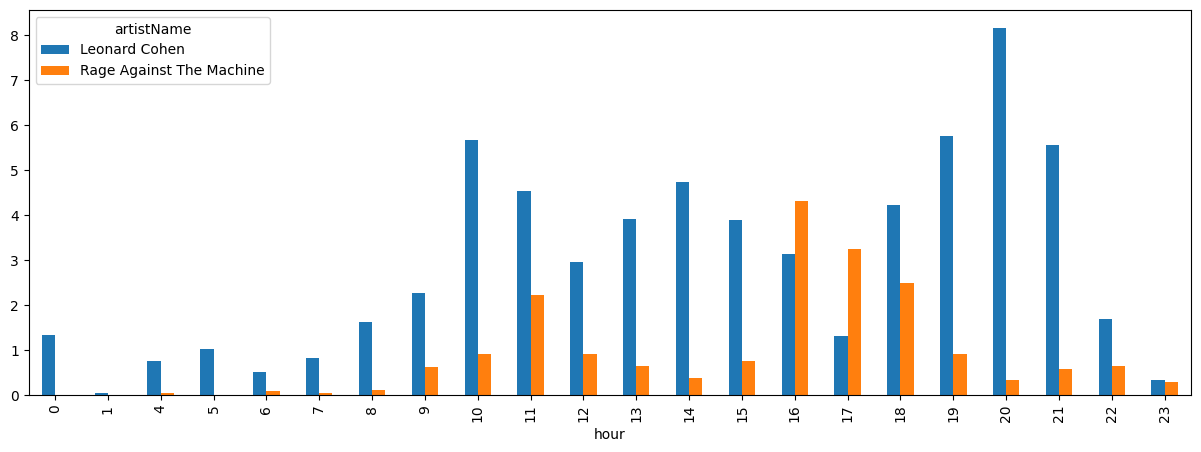

In [19]:
df_selected_hour = df_selected.groupby(["artistName", "hour"])["secPlayed"].sum() / 365
df_selected_hour = df_selected_hour.unstack(0)
df_selected_hour.plot(kind="bar", figsize=(15, 5))

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [20]:
df["skipped"] = df["secPlayed"] < 30


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

<Axes: ylabel='count'>

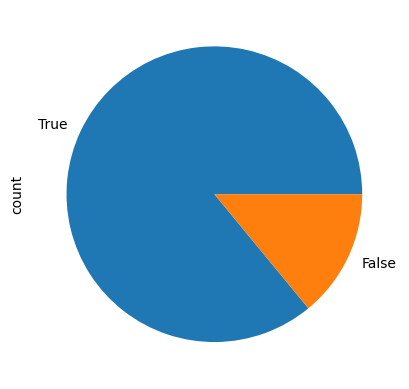

In [21]:
df["skipped"].value_counts().plot(kind="pie")

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [22]:
df_skipped = df.groupby("artistName")["skipped"].mean()
df_skipped["SkipRate"] = df["skipped"].mean()



#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [23]:
print("Top 3 most skipped artists:")
print(df_skipped.head(3))
print("Top 3 least skipped artists:")
print(df_skipped.tail(3))

Top 3 most skipped artists:
artistName
10cc            0.678571
2Pac            0.861598
3 Doors Down    0.500000
Name: skipped, dtype: float64
Top 3 least skipped artists:
artistName
xander.       0.375000
Édith Piaf    0.941935
SkipRate      0.859677
Name: skipped, dtype: float64


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [24]:
df_skipped

artistName
10cc             0.678571
2Pac             0.861598
3 Doors Down     0.500000
4 Non Blondes    0.721311
50 Cent          0.678571
                   ...   
tenkousei.       1.000000
trxxshed         0.500000
xander.          0.375000
Édith Piaf       0.941935
SkipRate         0.859677
Name: skipped, Length: 957, dtype: float64

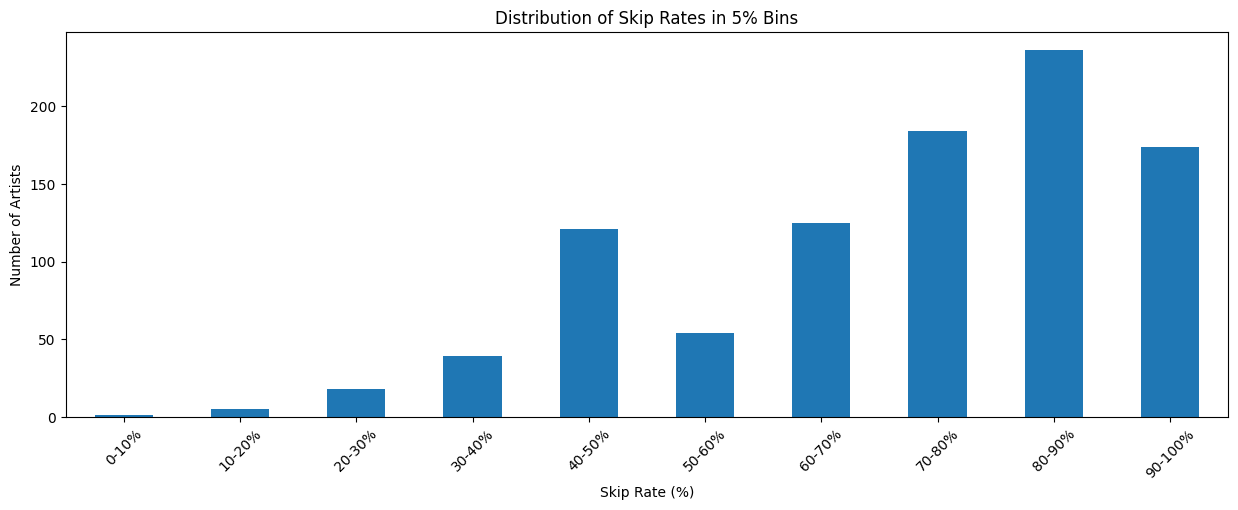

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, 1.1, 0.1)  # Bins from 0 to 1 in steps of 0.05
labels = [f"{int(b*100)}-{int((b+0.1)*100)}%" for b in bins[:-1]]  # Bin labels
df_skipped_bins = pd.cut(df_skipped, bins=bins, labels=labels, include_lowest=True)
df_skipped_counts = df_skipped_bins.value_counts().sort_index()

df_skipped_counts.plot(kind="bar", figsize=(15, 5))
plt.xlabel("Skip Rate (%)")
plt.ylabel("Number of Artists")
plt.title("Distribution of Skip Rates in 5% Bins")
plt.xticks(rotation=45)
plt.show()


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

In [26]:
print(f"Skip rate is: {df_skipped["Ariana Grande"]}")

Skip rate is: 0.9952939959662822


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?